In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=f40b199f7ce4a3dc02edd9da1eec50a0a4a46db1d39090449cdb6227f1a2f283
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pyspark

In [ ]:
pyspark.__version__

'3.5.0'

In [ ]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('s_test').getOrCreate()

In [ ]:
spark


In [ ]:
df = spark.read.csv('/content/drive/MyDrive/heart.csv',header=True,nullValue="Nan", inferSchema=True)

In [ ]:
df.show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
| 57|  1|  0|   140| 192|  0|      1|     148|   0|    0.4|  1|  0|    1|     1|
| 56|  0|  1|   140| 294|  0|      0|     153|   0|    1.3|  1|  0|    2|     1|
| 44|  1|  1|   120| 263|  0|      1|     173|   0|    0.0|  2|  0|    3|     1|
| 52|  1|  2|   172| 199|  1|      1|     162|   0|    0.5|  2|  0|    3|     1|
| 57|  1|  2|   150| 168|  0

In [ ]:
df.take(3)

[Row(age=63, sex=1, cp=3, trtbps=145, chol=233, fbs=1, restecg=0, thalachh=150, exng=0, oldpeak=2.3, slp=0, caa=0, thall=1, output=1),
 Row(age=37, sex=1, cp=2, trtbps=130, chol=250, fbs=0, restecg=1, thalachh=187, exng=0, oldpeak=3.5, slp=0, caa=0, thall=2, output=1),
 Row(age=41, sex=0, cp=1, trtbps=130, chol=204, fbs=0, restecg=0, thalachh=172, exng=0, oldpeak=1.4, slp=2, caa=0, thall=2, output=1)]

In [ ]:
df.limit(3)

DataFrame[age: int, sex: int, cp: int, trtbps: int, chol: int, fbs: int, restecg: int, thalachh: int, exng: int, oldpeak: double, slp: int, caa: int, thall: int, output: int]

In [ ]:
df.columns

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [ ]:
len(df.columns)

14

In [ ]:
df.count()

303

In [ ]:
df.dtypes

[('age', 'int'),
 ('sex', 'int'),
 ('cp', 'int'),
 ('trtbps', 'int'),
 ('chol', 'int'),
 ('fbs', 'int'),
 ('restecg', 'int'),
 ('thalachh', 'int'),
 ('exng', 'int'),
 ('oldpeak', 'double'),
 ('slp', 'int'),
 ('caa', 'int'),
 ('thall', 'int'),
 ('output', 'int')]

In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trtbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalachh: integer (nullable = true)
 |-- exng: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slp: integer (nullable = true)
 |-- caa: integer (nullable = true)
 |-- thall: integer (nullable = true)
 |-- output: integer (nullable = true)



In [ ]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                sex|                cp|            trtbps|              chol|                fbs|          restecg|          thalachh|               exng|           oldpeak|               slp|               caa|             thall|            output|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|                303|               303|               303|               303|                303|              303|               303|    

In [ ]:
df.select(['Age', 'Sex']).show(10)

+---+---+
|Age|Sex|
+---+---+
| 63|  1|
| 37|  1|
| 41|  0|
| 56|  1|
| 57|  0|
| 57|  1|
| 56|  0|
| 44|  1|
| 52|  1|
| 57|  1|
+---+---+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import col
null_counts = df.select([col(c).isNull().alias(c) for c in df.columns])
null_counts.show(303)

+-----+-----+-----+------+-----+-----+-------+--------+-----+-------+-----+-----+-----+------+
|  age|  sex|   cp|trtbps| chol|  fbs|restecg|thalachh| exng|oldpeak|  slp|  caa|thall|output|
+-----+-----+-----+------+-----+-----+-------+--------+-----+-------+-----+-----+-----+------+
|false|false|false| false|false|false|  false|   false|false|  false|false|false|false| false|
|false|false|false| false|false|false|  false|   false|false|  false|false|false|false| false|
|false|false|false| false|false|false|  false|   false|false|  false|false|false|false| false|
|false|false|false| false|false|false|  false|   false|false|  false|false|false|false| false|
|false|false|false| false|false|false|  false|   false|false|  false|false|false|false| false|
|false|false|false| false|false|false|  false|   false|false|  false|false|false|false| false|
|false|false|false| false|false|false|  false|   false|false|  false|false|false|false| false|
|false|false|false| false|false|false|  false|   f

In [ ]:
df.groupby('sex').count().show(2)

+---+-----+
|sex|count|
+---+-----+
|  1|  207|
|  0|   96|
+---+-----+



In [ ]:
df.groupby('age').count().show(10)

+---+-----+
|age|count|
+---+-----+
| 65|    8|
| 53|    8|
| 34|    2|
| 76|    1|
| 44|   11|
| 47|    5|
| 52|   13|
| 40|    3|
| 57|   17|
| 54|   16|
+---+-----+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import desc,asc
df.groupBy('age').count().orderBy(asc('count')).show(80)

+---+-----+
|age|count|
+---+-----+
| 76|    1|
| 77|    1|
| 29|    1|
| 74|    1|
| 34|    2|
| 37|    2|
| 40|    3|
| 69|    3|
| 38|    3|
| 71|    3|
| 35|    4|
| 39|    4|
| 70|    4|
| 68|    4|
| 47|    5|
| 49|    5|
| 48|    7|
| 50|    7|
| 66|    7|
| 46|    7|
| 65|    8|
| 53|    8|
| 43|    8|
| 61|    8|
| 55|    8|
| 45|    8|
| 42|    8|
| 63|    9|
| 67|    9|
| 64|   10|
| 41|   10|
| 44|   11|
| 62|   11|
| 60|   11|
| 56|   11|
| 51|   12|
| 52|   13|
| 59|   14|
| 54|   16|
| 57|   17|
| 58|   19|
+---+-----+



In [ ]:
df.groupby('output').count().show(2)  # 1: Heartattack

+------+-----+
|output|count|
+------+-----+
|     1|  165|
|     0|  138|
+------+-----+



In [ ]:
from pyspark.sql.functions import min, max, avg
df.groupBy('output').agg(max('chol')).show(2)

+------+---------+
|output|max(chol)|
+------+---------+
|     1|      564|
|     0|      409|
+------+---------+



In [ ]:
df.groupBy('output').agg(avg('chol')).show(2)

+------+------------------+
|output|         avg(chol)|
+------+------------------+
|     1|242.23030303030302|
|     0|251.08695652173913|
+------+------------------+



In [ ]:
df.show(5)

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
only showing top 5 rows



In [ ]:
#Regression

X_cols = ['age', 'oldpeak', 'chol','trtbps']
target_col = ['thalachh'] #thalachh:maximum heartrate
my_cols = df['age', 'oldpeak', 'chol','trtbps', 'thalachh']

In [ ]:
from pyspark.ml.feature import VectorAssembler
VA = VectorAssembler(inputCols=X_cols, outputCol='feat_vec')
df = VA.transform(df)
data = df.select(['age', 'oldpeak', 'chol', 'feat_vec', 'thalachh'])

In [ ]:
trainset, testset = data.randomSplit([0.75, 0.25])

In [ ]:
from pyspark.ml.regression import LinearRegression
LR = LinearRegression(featuresCol='feat_vec', labelCol='thalachh')

In [ ]:
# train the model
LR = LR.fit(trainset)

In [ ]:
LR.coefficients

DenseVector([-1.0386, -5.664, 0.0267, 0.1746])

In [ ]:
pred = LR.transform(testset)

In [ ]:
pred = LR.evaluate(testset)

In [ ]:
pred.r2 #R2square

0.14811078621267704

In [ ]:
pred.meanSquaredError

470.30571107458337

In [ ]:
pred.meanAbsoluteError

16.780100497621135

In [ ]:
df.show(5)

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+--------------------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|            feat_vec|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+--------------------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|[63.0,2.3,233.0,1...|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|[37.0,3.5,250.0,1...|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|[41.0,1.4,204.0,1...|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|[56.0,0.8,236.0,1...|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|[57.0,0.6,354.0,1...|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+--------------------+
only showing top 5 rows



In [ ]:
df = df.drop('feat_vec')
df.show(5)

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
only showing top 5 rows



In [ ]:
X_cols1 = ['age', 'oldpeak', 'chol', 'thalachh', 'trtbps','fbs','exng']
target_col1 = ['output']
my_col1 = ['age', 'oldpeak', 'chol', 'thalachh', 'trtbps','fbs','exng','output']

In [ ]:
VA1 = VectorAssembler(inputCols=X_cols, outputCol='feature_vector')
df = VA1.transform(df)

In [ ]:
df.show(300)

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+--------------------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|      feature_vector|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+--------------------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|[63.0,2.3,233.0,1...|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|[37.0,3.5,250.0,1...|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|[41.0,1.4,204.0,1...|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|[56.0,0.8,236.0,1...|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|[57.0,0.6,354.0,1...|
| 57|  1|  0|   140| 192|  0|      1|     148|   0|    0.4|  1|  0|    1|     1|[57.0,0.4,192.0,1...|
| 56|  0|  1|   140| 294|  0|      0|     153|   0|    1.3|  1|  0|    2|     1|[5

In [ ]:
data = df.select(['feature_vector', 'output'])
data.show(5)

+--------------------+------+
|      feature_vector|output|
+--------------------+------+
|[63.0,2.3,233.0,1...|     1|
|[37.0,3.5,250.0,1...|     1|
|[41.0,1.4,204.0,1...|     1|
|[56.0,0.8,236.0,1...|     1|
|[57.0,0.6,354.0,1...|     1|
+--------------------+------+
only showing top 5 rows



In [ ]:
trainset, testset = data.randomSplit([0.75, 0.25])

In [ ]:
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression

In [ ]:
RFC = RandomForestClassifier(featuresCol='feature_vector', labelCol='output')
LRC = LogisticRegression(featuresCol='feature_vector', labelCol='output')

In [ ]:
RFC = RFC.fit(trainset)
LRC = LRC.fit(trainset)

In [ ]:
rf_pred = RFC.transform(testset)
lr_pred = LRC.transform(testset)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
eval = BinaryClassificationEvaluator(labelCol='output')

In [ ]:
rf_auc = eval.evaluate(rf_pred)
lr_auc = eval.evaluate(lr_pred)

In [ ]:
rf_auc

0.698016826923077

In [ ]:
lr_auc

0.6887019230769229

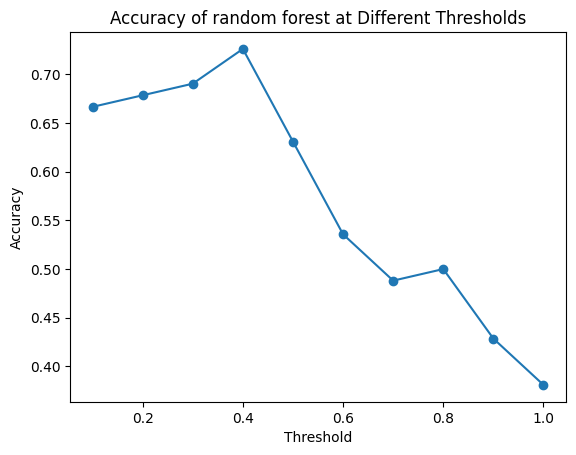

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

positive_probabilities = rf_pred.select("probability").rdd.map(lambda x: x.probability[1])


thresholds = np.arange(0.1, 1.1, 0.1)
accuracies = []

for threshold in thresholds:

    classified_predictions = positive_probabilities.map(lambda x: 1 if x >= threshold else 0)


    true_positive = classified_predictions.zip(rf_pred.select("output").rdd.map(lambda x: x.output)).filter(lambda x: x[0] == 1 and x[1] == 1).count()
    true_negative = classified_predictions.zip(rf_pred.select("output").rdd.map(lambda x: x.output)).filter(lambda x: x[0] == 0 and x[1] == 0).count()
    total = classified_predictions.count()

    accuracy = (true_positive + true_negative) / total
    accuracies.append(accuracy)


plt.plot(thresholds, accuracies, marker='o')
plt.title('Accuracy of random forest at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

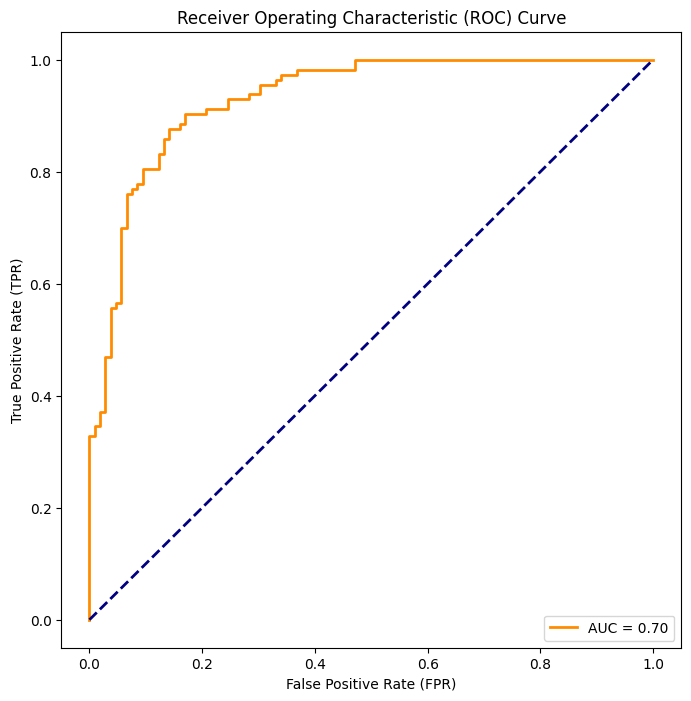

In [ ]:
roc = eval.evaluate(rf_pred, {eval.metricName: "areaUnderROC"})
roc_df = RFC.summary.roc.toPandas()

plt.figure(figsize=(8, 8))
plt.plot(roc_df['FPR'], roc_df['TPR'], color='darkorange', lw=2, label=f'AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

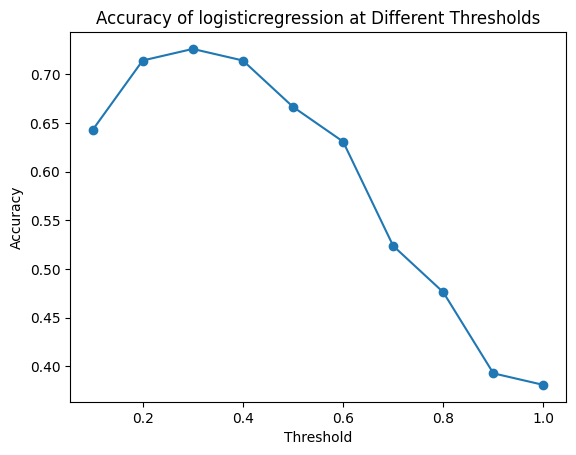

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

positive_probabilities = lr_pred.select("probability").rdd.map(lambda x: x.probability[1])


thresholds = np.arange(0.1, 1.1, 0.1)
accuracies = []

for threshold in thresholds:

    classified_predictions = positive_probabilities.map(lambda x: 1 if x >= threshold else 0)


    true_positive = classified_predictions.zip(lr_pred.select("output").rdd.map(lambda x: x.output)).filter(lambda x: x[0] == 1 and x[1] == 1).count()
    true_negative = classified_predictions.zip(lr_pred.select("output").rdd.map(lambda x: x.output)).filter(lambda x: x[0] == 0 and x[1] == 0).count()
    total = classified_predictions.count()

    accuracy = (true_positive + true_negative) / total
    accuracies.append(accuracy)


plt.plot(thresholds, accuracies, marker='o')
plt.title('Accuracy of logisticregression at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

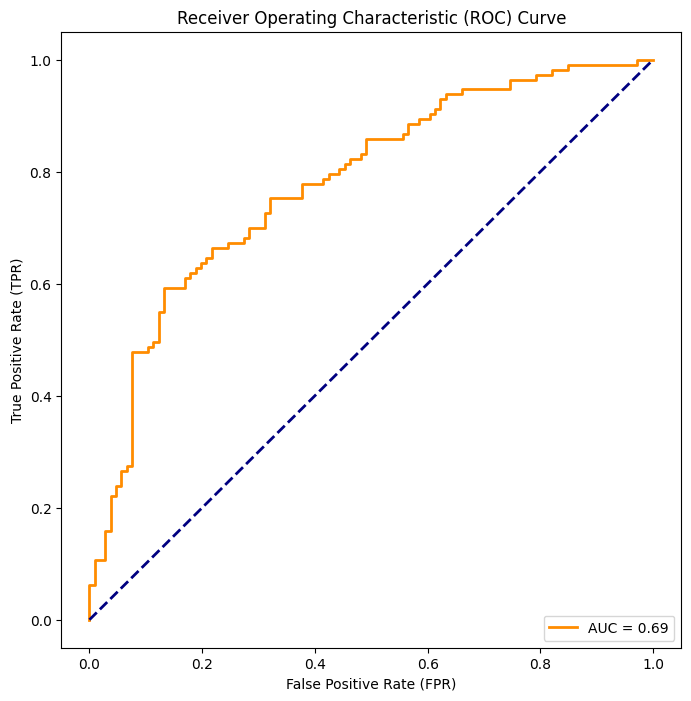

In [ ]:
roc = eval.evaluate(lr_pred, {eval.metricName: "areaUnderROC"})
roc_df = LRC.summary.roc.toPandas()

plt.figure(figsize=(8, 8))
plt.plot(roc_df['FPR'], roc_df['TPR'], color='darkorange', lw=2, label=f'AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()